# Multiple Linear Regression (MLR) Example

This is a SIMPLE sample implementation of Multiple Linear Regression using the `turtles` `MLR` class and various supporting functions.

The `MLR` class uses the Normal Equation to solve Ordinary Least Squares (OLS) in closed-form.

## Example Implementation

In [2]:
import json

from sklearn.datasets import load_diabetes
import pandas as pd

from turtles.stats.glms import MLR
from turtles.plotting import plot_y_vs_x
from turtles.stats import (
    pearson_corr,
    variance_inflation_factor,
    calculate_errors
)

In [3]:
pd.set_option("display.max_colwidth", None)

In [4]:
# sample data
X, y = load_diabetes(return_X_y=True)
y = y.reshape(y.shape[0], 1)

print("X:", X.shape)
print("y:", y.shape)

X: (442, 10)
y: (442, 1)


Pearson Corr: 0.5658825924427442
Pearson Corr P-value: 8.826458958879725e-39


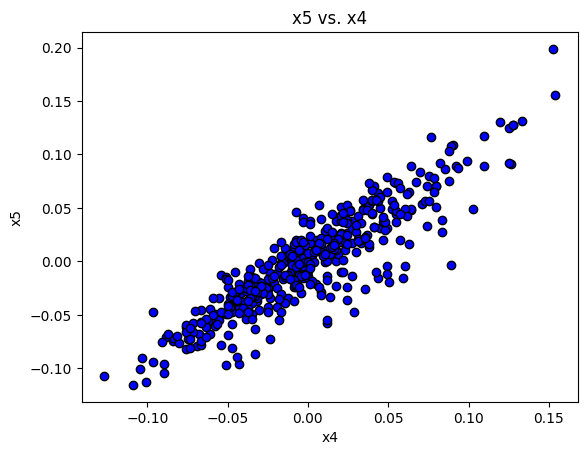

,Coefficient,R-squared,VIF
0,x0,0.178514,1.217307
1,x1,0.217571,1.278071
2,x2,0.337501,1.509437
3,x3,0.314800,1.459428
4,x4,0.983109,59.202510
5,x5,0.974485,39.193370
6,x6,0.935074,15.402156
7,x7,0.887527,8.890986
8,x8,0.900754,10.075967
9,x9,0.326428,1.484623


In [5]:
# simple EDA

# check for correlation between predictor and response
corr = pearson_corr(X[:, 8], y=y)
print("Pearson Corr:", corr[0])
print("Pearson Corr P-value:", corr[1])

# check predictor correlation
plot_y_vs_x(
    x=X[:, 4], 
    y=X[:, 5],
    title="x5 vs. x4",
    xlabel="x4",
    ylabel="x5"
)

# check VIF for multicollinearity
vifs = variance_inflation_factor(X)
display(vifs)

**NOTE**: Looks like we may have multicollinearity. We'd normally address this, but we'll leave it be for this demonstration.

In [6]:
# instantiate turtles model
model = MLR()

# fit model using all predictors
model.fit(X=X, y=y)

In [7]:
# model summary and goodness of fit
display(model.summary())
print("R-squared:", model.r2)
print()

,Variable,Coefficient,Std Error,t-statistic,p-value,[0.025,0.075]
0,Intercept,152.1335,2.5759,59.0614,0.0000,147.0707,157.1963
1,x0,-10.0099,59.7492,-0.1675,0.8670,-127.4460,107.4263
2,x1,-239.8156,61.2223,-3.9171,0.0001,-360.1471,-119.4841
3,x2,519.8459,66.5334,7.8133,0.0000,389.0755,650.6163
4,x3,324.3846,65.4220,4.9583,0.0000,195.7988,452.9705
5,x4,-792.1756,416.6799,-1.9012,0.0579,-1611.1530,26.8017
6,x5,476.7390,339.0305,1.4062,0.1604,-189.6198,1143.0978
7,x6,101.0433,212.5315,0.4754,0.6347,-316.6838,518.7703
8,x7,177.0632,161.4758,1.0965,0.2735,-140.3147,494.4412
9,x8,751.2737,171.9000,4.3704,0.0000,413.4072,1089.1402


R-squared: 0.5177484222203499



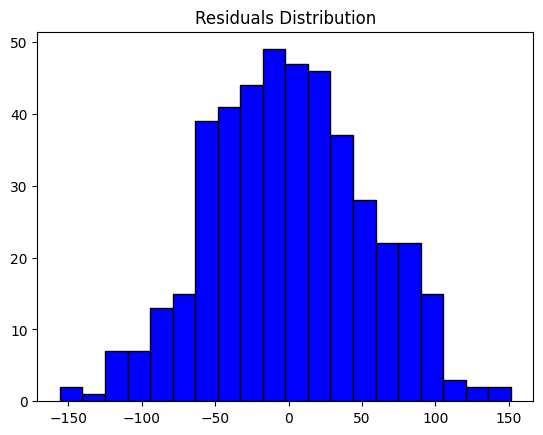

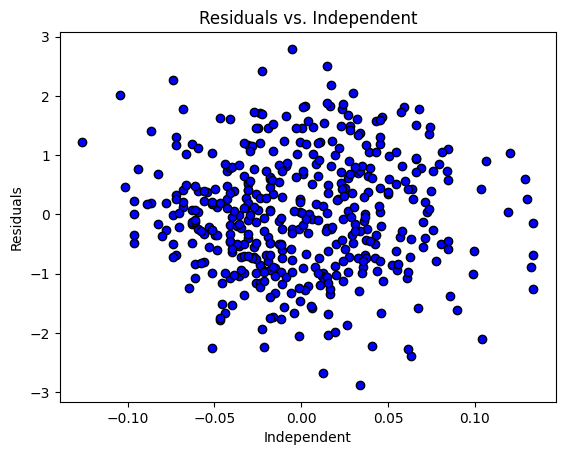

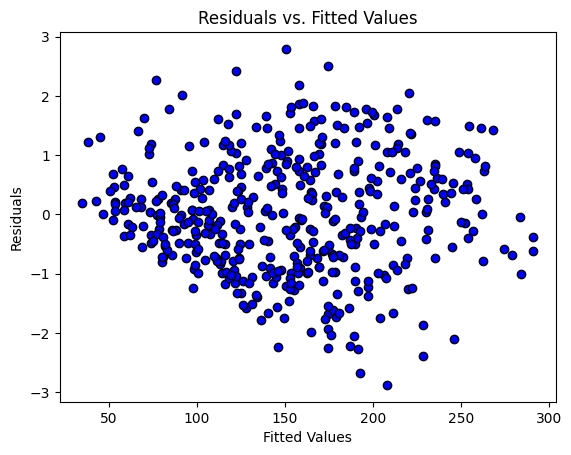

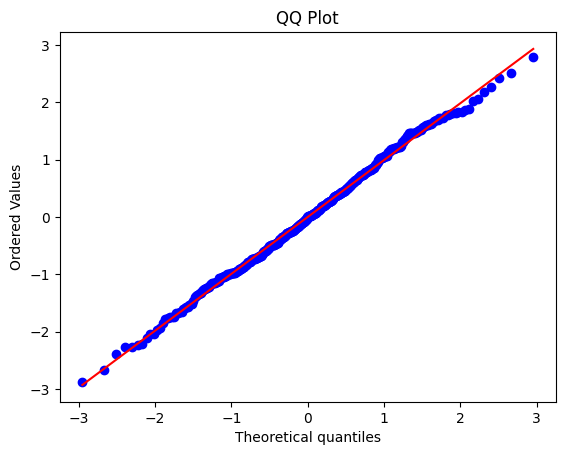

In [8]:
# check MLR assumptions
model.plot_residuals_hist()
model.plot_residuals_vs_ind(X[:,8])  # use a random variable
model.plot_residuals_vs_fitted()
model.qq_plot()

In [9]:
# predict (we'll just use the training data)
preds = model.predict(X)

# calculate errors
errors = calculate_errors(y_true=y, y_pred=preds)
print(json.dumps(errors, indent=2))

{
  "Sum of Squared Errors": 1263985.7856333435,
  "Mean Squared Error": 2859.69634758675,
  "Root Mean Squared Error": 53.47612876402657
}


## Compare to Statsmodels

Let's compare the `turtles` implementation to `statsmodels`.

In [10]:
import statsmodels.api as sm

In [11]:
# statsmodels model
X = sm.add_constant(X)
sm_model = sm.OLS(y, X).fit() 

# statsmodels results
print(sm_model.summary())
print()

# turtles results
display(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           3.83e-62
Time:                        12:11:16   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

,Variable,Coefficient,Std Error,t-statistic,p-value,[0.025,0.075]
0,Intercept,152.1335,2.5759,59.0614,0.0000,147.0707,157.1963
1,x0,-10.0099,59.7492,-0.1675,0.8670,-127.4460,107.4263
2,x1,-239.8156,61.2223,-3.9171,0.0001,-360.1471,-119.4841
3,x2,519.8459,66.5334,7.8133,0.0000,389.0755,650.6163
4,x3,324.3846,65.4220,4.9583,0.0000,195.7988,452.9705
5,x4,-792.1756,416.6799,-1.9012,0.0579,-1611.1530,26.8017
6,x5,476.7390,339.0305,1.4062,0.1604,-189.6198,1143.0978
7,x6,101.0433,212.5315,0.4754,0.6347,-316.6838,518.7703
8,x7,177.0632,161.4758,1.0965,0.2735,-140.3147,494.4412
9,x8,751.2737,171.9000,4.3704,0.0000,413.4072,1089.1402
